In [22]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [23]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [24]:
print("features:", features[0], '\nlabel:', labels[0])

features: tensor([-0.7871,  1.9907]) 
label: tensor([-4.1347])


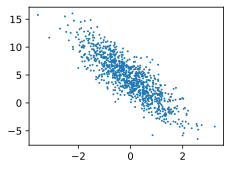

In [25]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

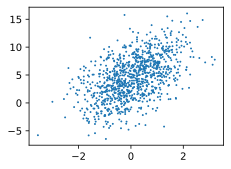

In [26]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1)

In [27]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 将样本的索引打乱
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [28]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[-0.2699, -0.9068],
        [-0.0279,  0.6533],
        [ 0.8736, -0.5993],
        [-1.3134,  0.9638],
        [-1.5744, -0.3204],
        [ 0.3981,  0.7466],
        [-0.0844, -0.7351],
        [ 0.3378, -0.0394],
        [-0.3868, -1.1961],
        [-0.8159,  1.3175]]) 
 tensor([[ 6.7489],
        [ 1.9139],
        [ 8.0025],
        [-1.6935],
        [ 2.1250],
        [ 2.4591],
        [ 6.5084],
        [ 5.0106],
        [ 7.4980],
        [-1.9090]])


In [29]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [30]:
def linreg(X, w, b): #@save
    return torch.matmul(X, w) + b

In [31]:
def squared_loss(y_hat, y): #@save
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [32]:
def sgd(params, lr, batch_size): #@save
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [33]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # l是有关小批量X和y的损失
        l.sum().backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)
    
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch {epoch + 1}, loss {float(train_l.mean()):f})")

epoch 1, loss 0.026744)
epoch 2, loss 0.000094)
epoch 3, loss 0.000052)
